In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Globally setting print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Education_Level,Pregnant,PIR,Race_Non-Hispanic Black,Race_Non-Hispanic White,Race_Other Hispanic,Marital_Status_Married/Living with Partner,Marital_Status_Never Married,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,3,0.0,1.99,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,3,0.0,4.65,0,1,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,4,0.0,5.00,0,1,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,2,0.0,2.15,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,2,0.0,0.46,0,1,0,0,1,0


In [3]:
data.shape

(24108, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24108 entries, 0 to 24107
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Little_interest_in_doing_things             24108 non-null  float64
 1   Feeling_down_or_depressed                   24108 non-null  float64
 2   Trouble_sleeping_or_sleeping_too_much       24108 non-null  float64
 3   Feeling_tired_or_having_little_energy       24108 non-null  float64
 4   Poor_appetite_or_overeating                 24108 non-null  float64
 5   Feeling_bad_about_yourself                  24108 non-null  float64
 6   Trouble_concentrating_on_things             24108 non-null  float64
 7   Moving_or_speaking_slowly_or_too_fast       24108 non-null  float64
 8   Thought_you_would_be_better_off_dead        24108 non-null  float64
 9   No_of_hours_you_sleep                       24108 non-null  float64
 10  How_often_

In [5]:
# Check for duplicates

data.duplicated().sum()

27

In [6]:
# Remove duplicate rows
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
# Check for missing values
data.isnull().sum()

Little_interest_in_doing_things               0
Feeling_down_or_depressed                     0
Trouble_sleeping_or_sleeping_too_much         0
Feeling_tired_or_having_little_energy         0
Poor_appetite_or_overeating                   0
Feeling_bad_about_yourself                    0
Trouble_concentrating_on_things               0
Moving_or_speaking_slowly_or_too_fast         0
Thought_you_would_be_better_off_dead          0
No_of_hours_you_sleep                         0
How_often_do_you_snore                        0
How_often_do_you_snort/stop_breathing         0
trouble_sleeping                              0
Sleep_Apnea                                   0
Blood_pressure                                0
Taking_Medication_for_HBP                     0
current_drinker                               0
past_drinker                                  0
current_smoker                                0
past_smoker                                   0
Gender                                  

### Split data into X and y

In [9]:
y = data['depression_category']
X = data.drop(columns=['depression_category'])

In [10]:
X.shape, y.shape

((24081, 30), (24081,))

### Handling class imbalance - SMOTENC Oversampling

In [12]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SMOTENC

# oversampling techniques

def oversample_data(X, y, method='smote', sampling_strategy='auto', random_state=42):
    if method == 'smote':
        oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'borderline':
        oversampler = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'adasyn':
        oversampler = ADASYN(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'smotenc':
        categorical_features = [True] * X.shape[1]
        categorical_features[1] = False
        oversampler = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=categorical_features, random_state=random_state)
    else:
        raise ValueError("Invalid oversampling method")

    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

In [13]:
sampling_strategy = 'auto'
X_os,y_os = oversample_data(X, y, method='smote', sampling_strategy=sampling_strategy)

In [14]:
X_os.shape, y_os.shape

((55884, 30), (55884,))

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=2)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [17]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (35765, 30) (35765,)
validation data(X_valid,y_valid) shape:  (8942, 30) (8942,)
test data(X_test,y_test) shape:  (11177, 30) (11177,)


### RF Baseline

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Train classifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Predict the model

y_pred_RF_baseline = model.predict(X_valid)

In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics

def metrics_calculation(y_actual, y_predicted,plot_roc_curve=True):
    #Classification report
    class_report=metrics.classification_report(y_actual,y_predicted)
    print("Classification report:\n",class_report)

    #Confusion Matrix
    conf_mat = metrics.confusion_matrix(y_actual,y_predicted,labels=None)
    print("Confusion Matrix:\n",conf_mat)

    #Confusion Matrix Display
    conf_display=metrics.ConfusionMatrixDisplay(conf_mat)
    conf_display.plot()
    plt.show()

    #Accuracy
    accuracy =metrics.accuracy_score(y_actual, y_predicted)
    print("Accuracy:",accuracy)

    #precision
    precision=metrics.precision_score(y_actual, y_predicted, average='weighted')
    print("Precision:",precision)

    #Recall
    recall=metrics.recall_score(y_actual, y_predicted, average='weighted')
    print("Recall:",recall)

    #sensitivity
    sensitivity = conf_mat[1, 1] / (conf_mat[1,1] + conf_mat[1,0])
    print("Sensitivity:",sensitivity)

    #specificity
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    print("Specificity:",specificity)

    #f1-score
    f1_score = metrics.f1_score(y_actual,y_predicted, average='weighted')
    print("F1-Score:",f1_score)

    #Cohen's Kappa score
    Kappa_score= metrics.cohen_kappa_score(y_actual,y_predicted)
    print("Cohen Kappa Score:",Kappa_score)

    #G-measure
    g_measure=2*(precision*recall)/(precision+recall)
    print("G_measure:",g_measure)

    #Informedness/Youdens statistic
    informedness=sensitivity+specificity-1
    print("Informedness/Youdens statistic:",informedness)

    #Positive predictive Value
    ppv= conf_mat[1,1] / (conf_mat[1,1] + conf_mat[0,1])
    print("PPV:",ppv)

     #Negative predictive Value
    npv= conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1,0])
    print("NPV:",npv)

    #Markedness
    marked=ppv+npv-1
    print("Markedness:",marked)

    # Matthews Correlation Coefficient
    mcc=((conf_mat[0, 0] * conf_mat[1, 1]) - (conf_mat[0, 1] * conf_mat[1, 0]))/np.sqrt((conf_mat[0, 0] + conf_mat[0, 1])
        * (conf_mat[0, 0] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[0, 1]))
    print("Matthews Correlation Coefficient",mcc)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2927
           1       0.99      0.99      0.99      3006
           2       1.00      0.99      1.00      3009

    accuracy                           0.99      8942
   macro avg       0.99      0.99      0.99      8942
weighted avg       0.99      0.99      0.99      8942

Confusion Matrix:
 [[2914   13    0]
 [  19 2982    5]
 [   0   17 2992]]


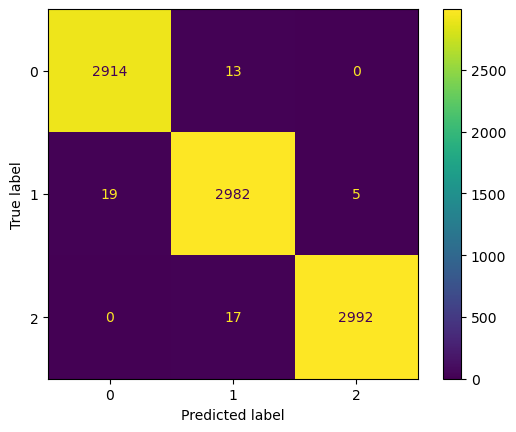

Accuracy: 0.9939610825318721
Precision: 0.9939698735170369
Recall: 0.9939610825318721
Sensitivity: 0.9936687770743086
Specificity: 0.9955585924154424
F1-Score: 0.9939634671743295
Cohen Kappa Score: 0.9909409755217905
G_measure: 0.9939654780050169
Informedness/Youdens statistic: 0.9892273694897509
PPV: 0.9956594323873121
NPV: 0.9935219911353563
Markedness: 0.9891814235226684
Matthews Correlation Coefficient 0.9892043962394509


In [22]:
metrics_calculation(y_valid, y_pred_RF_baseline, True)

ROC-AUC Score: 0.999921824375266


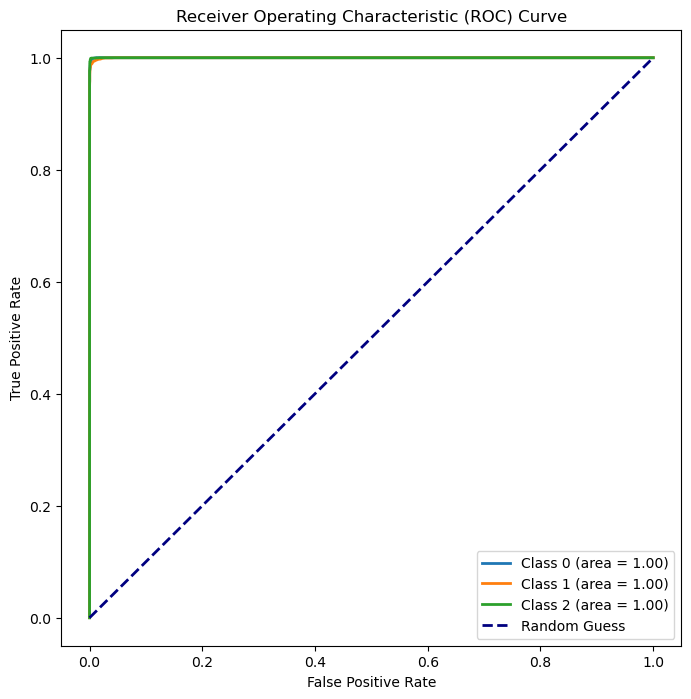

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict probabilities for the test data
y_pred_proba_RF_baseline = model.predict_proba(X_valid)

# Binarizing the output labels for multi-class
classes = np.unique(y_train)
y_valid_binarized = label_binarize(y_valid, classes=classes)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_valid_binarized, y_pred_proba_RF_baseline, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_valid_binarized[:, i], y_pred_proba_RF_baseline[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter tuning

In [24]:
# defining a grid search like function for decision tree to get hyper parameters
def rf_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_test, y_train, y_test):
  for k in range(0,len(criterions_array)):
    for i in range(0, len(max_depth_array)):
      for j in range(0,len(min_s_leaf_array)):
        max_depth_val = max_depth_array[i]
        min_s_leaf_val = min_s_leaf_array[j]
        criterion_val = criterions_array[k]
        d_tree_clf = RandomForestClassifier(max_depth=max_depth_val, min_samples_leaf=min_s_leaf_val, criterion=criterion_val, random_state=2023)#####
        d_tree_clf = d_tree_clf.fit(X_train,y_train)
        y_pred = d_tree_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        parameters_dict = {'criterion':criterion_val, 'max_depth':max_depth_val, 'min_samples_leaf': min_s_leaf_val, 'accuracy': accuracy, 'F1_score':F1_score, 'precision':precision, 'recall':recall}
        params.append(parameters_dict)
        print(f'criterion:{criterion_val}, max_depth:{max_depth_val}, min_samples_leaf:{min_s_leaf_val}, accuracy:{accuracy}, F1_score:{F1_score}')

In [25]:
#hyperparameters
max_depth_array = [2,4,6,8,10]
min_s_leaf_array = [5,10,15]
criterions_array = ['gini','entropy']
params = list()

rf_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_valid, y_train, y_valid)

criterion:gini, max_depth:2, min_samples_leaf:5, accuracy:0.910087228807873, F1_score:0.9097736266322034
criterion:gini, max_depth:2, min_samples_leaf:10, accuracy:0.910087228807873, F1_score:0.9097736266322034
criterion:gini, max_depth:2, min_samples_leaf:15, accuracy:0.910087228807873, F1_score:0.9097736266322034
criterion:gini, max_depth:4, min_samples_leaf:5, accuracy:0.9414001341981659, F1_score:0.9420153710191776
criterion:gini, max_depth:4, min_samples_leaf:10, accuracy:0.9414001341981659, F1_score:0.9420153710191776
criterion:gini, max_depth:4, min_samples_leaf:15, accuracy:0.9414001341981659, F1_score:0.9420153710191776
criterion:gini, max_depth:6, min_samples_leaf:5, accuracy:0.9586222321628272, F1_score:0.9590686527825983
criterion:gini, max_depth:6, min_samples_leaf:10, accuracy:0.9587340639677925, F1_score:0.9591580022929082
criterion:gini, max_depth:6, min_samples_leaf:15, accuracy:0.9568329232833818, F1_score:0.9573047382684315
criterion:gini, max_depth:8, min_samples_le

In [26]:
from operator import itemgetter
from tabulate import tabulate

# lets sort the metrics in descending order
param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
df = pd.DataFrame.from_dict(param_sorted)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

# optimal set of hyperparameters will be the top value in the sorted parameter list
opt_hparams = param_sorted[0]
print('**'*60)
print(f'\noptimal hyper-parameters: {opt_hparams}\n')
print('**'*60)

+----+-------------+-------------+--------------------+------------+------------+-------------+----------+
|    | criterion   |   max_depth |   min_samples_leaf |   accuracy |   F1_score |   precision |   recall |
|----+-------------+-------------+--------------------+------------+------------+-------------+----------|
|  0 | gini        |          10 |                  5 |   0.98166  |   0.981764 |    0.982295 | 0.981594 |
|  1 | entropy     |          10 |                  5 |   0.9811   |   0.981218 |    0.981649 | 0.981092 |
|  2 | entropy     |          10 |                 10 |   0.980765 |   0.980875 |    0.981226 | 0.980765 |
|  3 | gini        |          10 |                 10 |   0.979311 |   0.979444 |    0.980058 | 0.979261 |
|  4 | entropy     |          10 |                 15 |   0.979199 |   0.979312 |    0.97972  | 0.979186 |
|  5 | gini        |          10 |                 15 |   0.978081 |   0.978227 |    0.978841 | 0.978054 |
|  6 | gini        |           8 |   

### Cross validation

In [27]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def cross_validation_func(model, X_train, y_train, c_v=5):
    # Use StratifiedKFold for balanced splits
    stratified_k_fold = StratifiedKFold(n_splits=c_v, shuffle=True, random_state=2023)

    # Define custom scorers with averaging method for multi-class settings
    scoring_array = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro'),  # Change 'macro' to 'micro' or 'weighted' as needed
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    results_scores = cross_validate(estimator=model,
                                    X=X_train,
                                    y=y_train,
                                    cv=stratified_k_fold,
                                    scoring=scoring_array,
                                    return_train_score=True)

    return {
        "Mean Train Accuracy": results_scores['train_accuracy'].mean(),
        "Mean Train Precision": results_scores['train_precision'].mean(),
        "Mean Train Recall": results_scores['train_recall'].mean(),
        "Mean Train F1 Score": results_scores['train_f1'].mean(),
        "Mean Valid Accuracy": results_scores['test_accuracy'].mean(),
        "Mean Valid Precision": results_scores['test_precision'].mean(),
        "Mean Valid Recall": results_scores['test_recall'].mean(),
        "Mean Valid F1 Score": results_scores['test_f1'].mean()
    }

In [28]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation
model_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=5, criterion='gini', random_state=2023)
model_tuned.fit(X_train_full, y_train_full)
cross_validation_func(model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.9854720698442355,
 'Mean Train Precision': 0.9858488909951187,
 'Mean Train Recall': 0.9854539923492064,
 'Mean Train F1 Score': 0.9855163445868428,
 'Mean Valid Accuracy': 0.9788624055042512,
 'Mean Valid Precision': 0.9795023918721831,
 'Mean Valid Recall': 0.9788472993542425,
 'Mean Valid F1 Score': 0.9789574067617938}

### Testing DT with optimal hyperparameters on unseen data

In [29]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='orange', label='Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

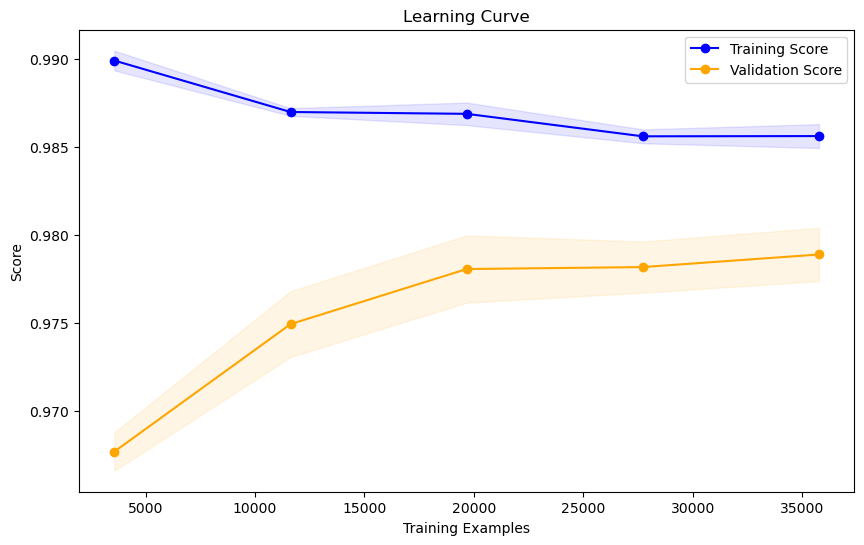

In [30]:
model_opt = RandomForestClassifier(max_depth=10, min_samples_leaf=5, criterion='gini', random_state=2023)
model_opt.fit(X_train_full, y_train_full)
y_pred_RF_opt = model.predict(X_test)
plot_learning_curve(model_opt, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3815
           1       0.99      0.99      0.99      3720
           2       1.00      0.99      1.00      3642

    accuracy                           0.99     11177
   macro avg       0.99      0.99      0.99     11177
weighted avg       0.99      0.99      0.99     11177

Confusion Matrix:
 [[3785   30    0]
 [  30 3685    5]
 [   0   26 3616]]


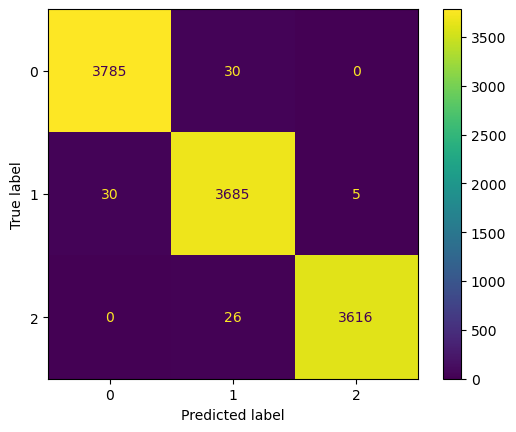

Accuracy: 0.9918582803972443
Precision: 0.9918838111242895
Recall: 0.9918582803972443
Sensitivity: 0.9919246298788694
Specificity: 0.9921363040629095
F1-Score: 0.9918657287063835
Cohen Kappa Score: 0.9877849784780032
G_measure: 0.9918710455964769
Informedness/Youdens statistic: 0.984060933941779
PPV: 0.9919246298788694
NPV: 0.9921363040629095
Markedness: 0.984060933941779
Matthews Correlation Coefficient 0.9840609339417791


In [31]:
metrics_calculation(y_test, y_pred_RF_opt, True)

ROC-AUC Score: 0.999921824375266


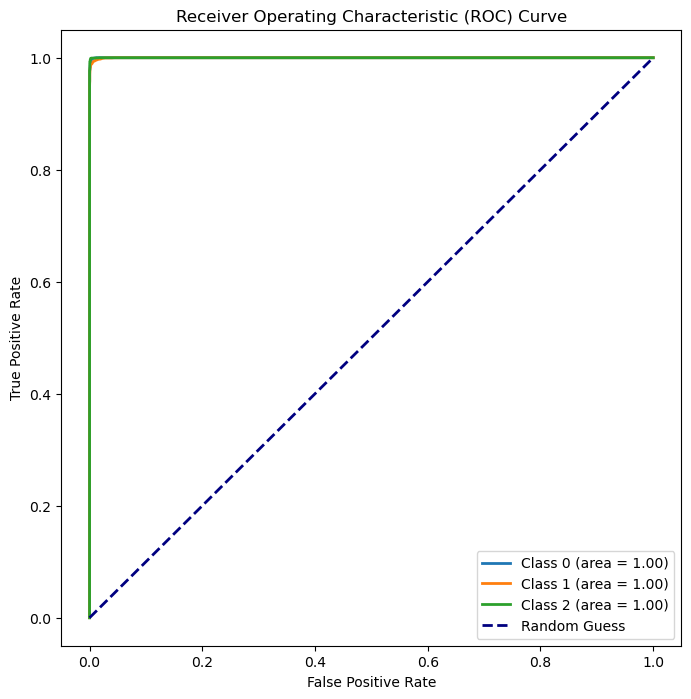

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict probabilities for the test data
y_pred_proba_RF_opt = model.predict_proba(X_valid)

# Binarizing the output labels for multi-class
classes = np.unique(y_train)
y_valid_binarized = label_binarize(y_valid, classes=classes)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_valid_binarized, y_pred_proba_RF_opt, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_valid_binarized[:, i], y_pred_proba_RF_opt[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()